In [1]:

import numpy as np 
import pandas as pd
import gudhi
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.spatial.distance import squareform, pdist
import matplotlib.patches as mpatches 
from matplotlib.collections import PatchCollection



In [2]:
df = pd.read_csv("Activity1.csv")
dfnuevo = df.rename(columns= {"0": "p1", "1": "p2"})
dfnuevo.max()

p1    1.124707
p2    1.160988
dtype: float64

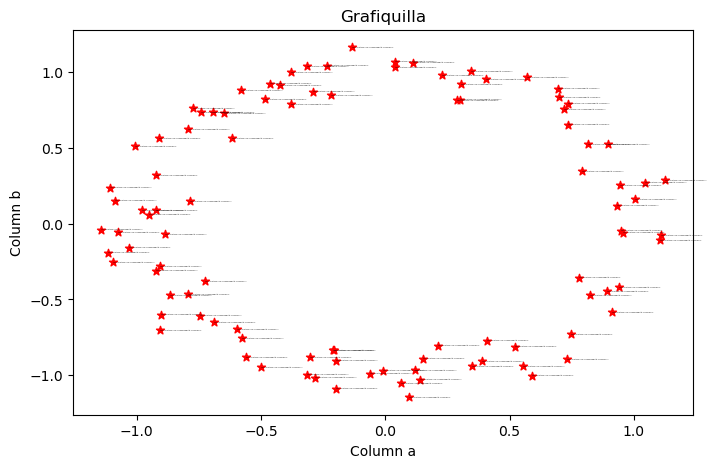

In [3]:
plt.figure(figsize =(8,5))
plt.scatter(dfnuevo["p1"],dfnuevo["p2"],c="r",marker="*")
plt.xlabel("Column a")
plt.ylabel("Column b")

plt.title("Grafiquilla")
for j in dfnuevo.itertuples():
    plt.annotate(j.index,(j.p1,j.p2),fontsize=0)

In [4]:
dist=pd.DataFrame(squareform(pdist(dfnuevo[["p1","p2"]]),"euclidean"),columns=dfnuevo.index.values,index=dfnuevo.index.values)
dist

0         1         2         3         4         5         6   \
0   0.000000  1.485551  0.617617  1.838258  0.899133  1.953101  1.675884   
1   1.485551  0.000000  1.025151  1.210266  1.857029  1.861869  0.350995   
2   0.617617  1.025151  0.000000  1.771613  1.392533  2.118670  1.302420   
3   1.838258  1.210266  1.771613  0.000000  1.565799  0.759963  0.931277   
4   0.899133  1.857029  1.392533  1.565799  0.000000  1.327453  1.882518   
..       ...       ...       ...       ...       ...       ...       ...   
95  1.154722  0.381746  0.647695  1.395358  1.665004  1.941771  0.695625   
96  1.266636  2.211048  1.783139  1.749808  0.391843  1.336528  2.202346   
97  1.099185  0.427753  0.598041  1.396198  1.616591  1.924638  0.729730   
98  1.871510  1.688370  1.992680  0.582859  1.320315  0.180234  1.463273   
99  0.221128  1.471026  0.500694  1.967375  1.120216  2.139688  1.700662   

          7         8         9   ...        90        91        92        93  \
0   1.746904  0.251628  0.415931  ...  0.439108  1.377628  2.035153  0.238751   
1   0.666535  1.693717  1.148452  ...  1.828640  2.183543  1.324574  1.253893   
2   1.482042  0.868867  0.202658  ...  1.052383  1.851240  1.953305  0.402207   
3   0.600631  1.907239  1.753888  ...  1.929427  1.617595  0.197498  1.708330   
4   1.781682  0.738533  1.209981  ...  0.609013  0.478495  1.747378  1.013645   
..       ...       ...       ...  ...       ...       ...       ...       ...   
95  0.949291  1.381125  0.786766  ...  1.534243  2.048568  1.544391  0.916899   
96  2.060810  1.074972  1.598143  ...  0.911705  0.201778  1.912102  1.399637   
97  0.969574  1.325628  0.732893  ...  1.479161  2.004957  1.550017  0.861417   
98  1.157728  1.862635  1.916541  ...  1.825976  1.210617  0.648617  1.811605   
99  1.812800  0.436695  0.326216  ...  0.627736  1.598708  2.162078  0.261293   

          94        95        96        97        98        99  
0   1.412562  1.154722  1.266636  1.099185  1.871510  0.221128  
1   2.092554  0.381746  2.211048  0.427753  1.688370  1.471026  
2   1.841215  0.647695  1.783139  0.598041  1.992680  0.500694  
3   1.461027  1.395358  1.749808  1.396198  0.582859  1.967375  
4   0.531153  1.665004  0.391843  1.616591  1.320315  1.120216  
..       ...       ...       ...       ...       ...       ...  
95  1.984259  0.000000  2.042786  0.055574  1.781848  1.112789  
96  0.361985  2.042786  0.000000  1.995962  1.381533  1.485644  
97  1.943547  0.055574  1.995962  0.000000  1.767170  1.058718  
98  1.039881  1.781848  1.381533  1.767170  0.000000  2.048146  
99  1.632769  1.112789  1.485644  1.058718  2.048146  0.000000  

[100 rows x 100 columns]

In [5]:
new_points = dfnuevo[['p1', 'p2']].values.tolist()
rips_complex = gudhi.RipsComplex(points=new_points, max_edge_length=2.0)
alpha_complex = gudhi.AlphaComplex(points=new_points)

In [6]:
simplex_tree=rips_complex.create_simplex_tree(max_dimension=2)
result_str="Rips Complex us of dimension"+ repr(simplex_tree.dimension())+"-"+ \
    repr(simplex_tree.num_simplices())+ "simplices -" + \
    repr(simplex_tree.num_vertices())+  "vertices."
print(result_str)

Rips Complex us of dimension2-122305simplices -100vertices.


In [7]:
simplex_tree1=alpha_complex.create_simplex_tree()
result_str="Rips Complex us of dimension"+ repr(simplex_tree1.dimension())+"-"+ \
    repr(simplex_tree1.num_simplices())+ "simplices -" + \
    repr(simplex_tree1.num_vertices())+  "vertices."
print(result_str)

Rips Complex us of dimension2-557simplices -100vertices.


In [8]:
def plot_rips_complex(data, R, label="data", col=1, maxdim=2):
    tab10 = cm.get_cmap('tab10')

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(label)
    ax.scatter(
        data[:, 0], data[:, 1], label=label,
        s=8, alpha=0.9, c=np.array(tab10([col] * len(data)))
    )

    for xy in data:
        ax.add_patch(mpatches.Circle(xy, radius=R, fc='none', ec=tab10(col), alpha=0.2))

    for i, xy in enumerate(data):
        if maxdim >=1:
            for j in range(i + 1, len(data)):
                pq = data[j]
                if (xy != pq).all() and (np.linalg.norm(xy - pq) <= R):
                    pts = np.array([xy, pq])
                    ax.plot(pts[:, 0], pts[:, 1], color=tab10(col), alpha=0.6, linewidth=1)
                if maxdim == 2:
                    for k in range(j + 1, len(data)):
                        ab = data[k]
                        if ((ab != pq).all()
                                and (np.linalg.norm(xy - pq) <= R)
                                and (np.linalg.norm(xy - ab) <= R)
                                and (np.linalg.norm(pq - ab) <= R)
                        ):
                            pts = np.array([xy, pq, ab])
                            ax.fill(pts[:, 0], pts[:, 1], facecolor=tab10(col), alpha=0.1)
                        pass

    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    pass


/var/folders/0n/92mz65hj527d4cmt71d5s0q00000gn/T/ipykernel_37637/2148356154.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


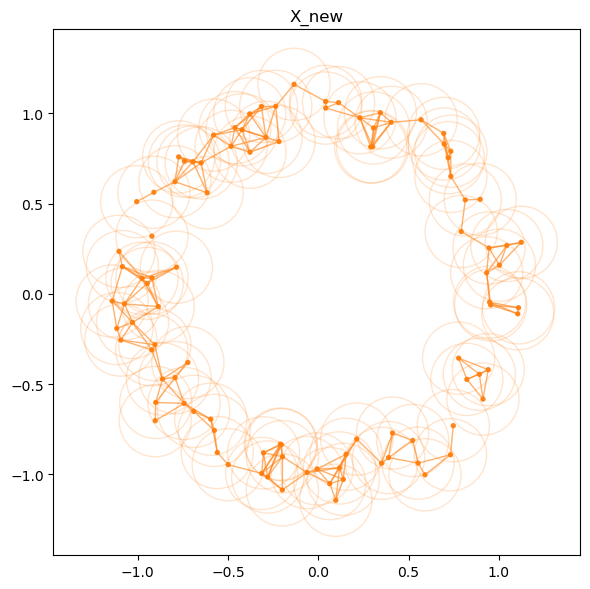

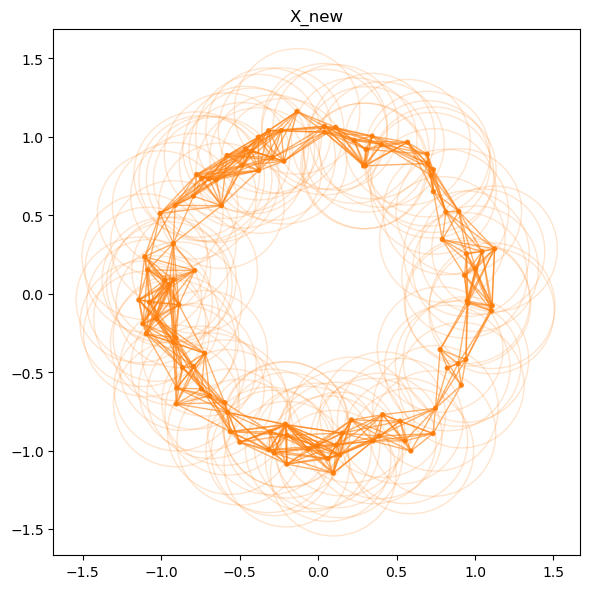

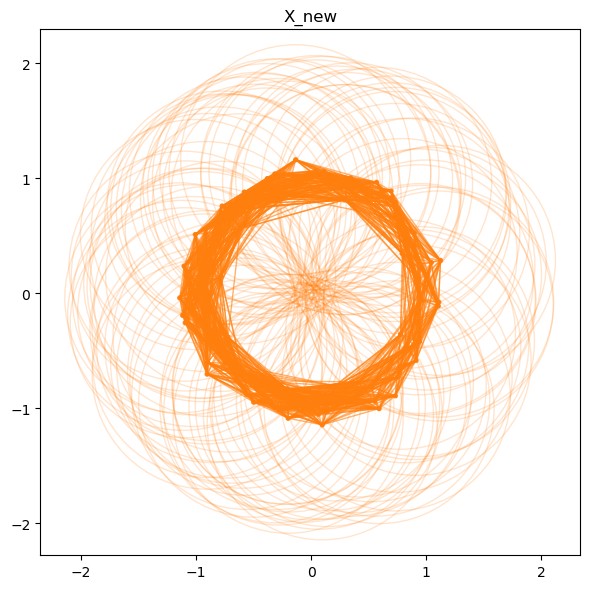

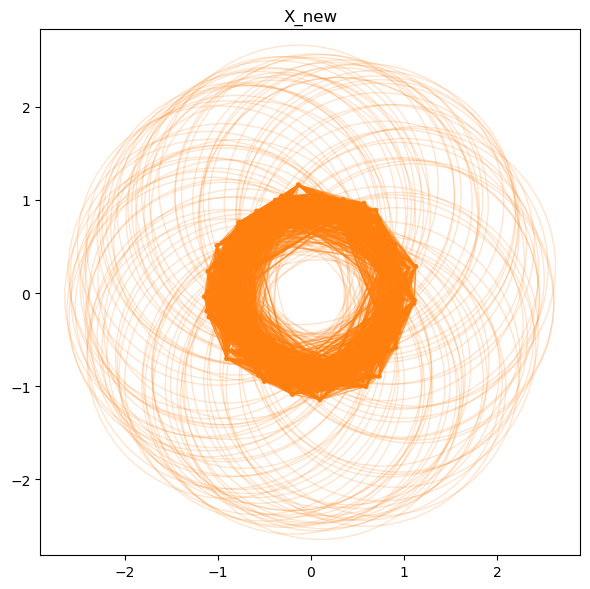

In [9]:
X_new = dfnuevo[['p1', 'p2']].values
plot_rips_complex(X_new, R=.2, label="X_new", maxdim=1)
plot_rips_complex(X_new, R=0.4, label="X_new", maxdim=1)
plot_rips_complex(X_new, R=1, label="X_new", maxdim=1)
plot_rips_complex(X_new, R=1.5, label="X_new", maxdim=1)

In [10]:
ndf = pd.read_csv("Activity2.csv")
ndf
dfnw = ndf.rename(columns= {"0": "p1", "1": "p2"})
dfnw.max()

p1    1.861161
p2    1.721905
dtype: float64

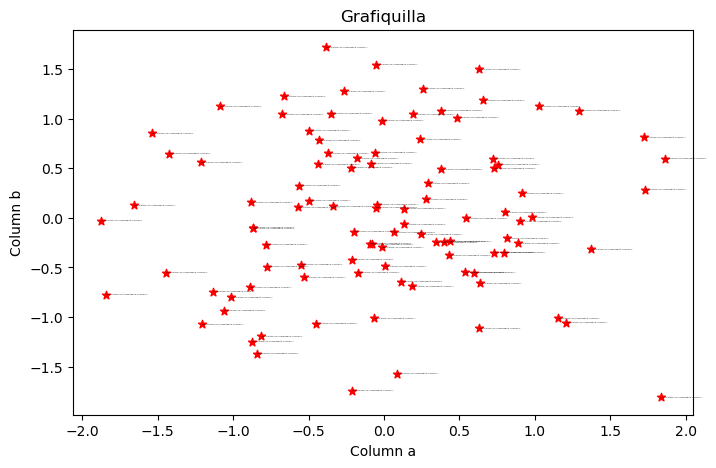

In [11]:
plt.figure(figsize =(8,5))
plt.scatter(dfnw["p1"],dfnw["p2"],c="r",marker="*")
plt.xlabel("Column a")
plt.ylabel("Column b")

plt.title("Grafiquilla")
for j in dfnw.itertuples():
    plt.annotate(j.index,(j.p1,j.p2),fontsize=0)

In [12]:
dist=pd.DataFrame(squareform(pdist(dfnw[["p1","p2"]]),"euclidean"),columns=dfnuevo.index.values,index=dfnuevo.index.values)
dist

0         1         2         3         4         5         6   \
0   0.000000  0.339478  1.636339  0.797410  1.002980  1.219369  0.811375   
1   0.339478  0.000000  1.526815  1.060195  1.106656  1.448557  1.006970   
2   1.636339  1.526815  0.000000  1.529563  0.969490  1.500964  1.282340   
3   0.797410  1.060195  1.529563  0.000000  0.572920  0.437453  0.247309   
4   1.002980  1.106656  0.969490  0.572920  0.000000  0.578646  0.330091   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.951810  1.187996  1.451334  0.182448  0.482039  0.267624  0.222402   
96  1.129662  1.427643  1.855237  0.404428  0.887653  0.430435  0.611002   
97  0.696764  1.034317  1.958068  0.508002  1.049725  0.886724  0.723014   
98  1.181491  1.474422  1.849232  0.435788  0.885795  0.395659  0.625372   
99  1.093202  0.986229  0.546283  1.118798  0.650006  1.228209  0.885584   

          7         8         9   ...        90        91        92        93  \
0   1.438593  0.527756  1.363058  ...  2.477545  0.887711  1.408473  0.997360   
1   1.436712  0.257549  1.484403  ...  2.802076  1.150206  1.710089  1.292399   
2   0.505953  1.289271  1.032942  ...  3.117014  1.552354  2.048693  1.768501   
3   1.118052  1.093768  0.771242  ...  1.815111  0.090732  0.679593  0.276629   
4   0.547060  1.003258  0.378188  ...  2.212235  0.585148  1.099481  0.799231   
..       ...       ...       ...  ...       ...       ...       ...       ...   
95  1.006628  1.188887  0.608789  ...  1.779270  0.129212  0.642757  0.319869   
96  1.396670  1.487689  0.940590  ...  1.411014  0.335800  0.282901  0.135784   
97  1.594645  1.179709  1.279237  ...  1.797680  0.551678  0.813094  0.488632   
98  1.382720  1.526641  0.913332  ...  1.381885  0.359121  0.243820  0.184147   
99  0.555299  0.759320  0.905520  ...  2.858240  1.165134  1.732941  1.385756   

          94        95        96        97        98        99  
0   2.097195  0.951810  1.129662  0.696764  1.181491  1.093202  
1   2.406674  1.187996  1.427643  1.034317  1.474422  0.986229  
2   3.519124  1.451334  1.855237  1.958068  1.849232  0.546283  
3   2.008119  0.182448  0.404428  0.508002  0.435788  1.118798  
4   2.580706  0.482039  0.887653  1.049725  0.885795  0.650006  
..       ...       ...       ...       ...       ...       ...  
95  2.130836  0.000000  0.407256  0.678557  0.412173  1.093287  
96  1.790857  0.407256  0.000000  0.579399  0.063017  1.495541  
97  1.564646  0.678557  0.579399  0.000000  0.642206  1.480571  
98  1.829278  0.412173  0.063017  0.642206  0.000000  1.505324  
99  3.043604  1.093287  1.495541  1.480571  1.505324  0.000000  

[100 rows x 100 columns]

In [13]:
new_points = dfnw[['p1', 'p2']].values.tolist()
rips_complex = gudhi.RipsComplex(points=new_points, max_edge_length=2.0)

In [14]:
simplex_tree=rips_complex.create_simplex_tree(max_dimension=2)
result_str="Rips Complex us of dimension"+ repr(simplex_tree.dimension())+"-"+ \
    repr(simplex_tree.num_simplices())+ "simplices -" + \
    repr(simplex_tree.num_vertices())+  "vertices."
print(result_str)

fmt = "%s -> %.2f"

for filtered_value in simplex_tree.get_filtration():
    print( fmt % tuple(filtered_value))


Rips Complex us of dimension2-94092simplices -100vertices.
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[7] -> 0.00
[8] -> 0.00
[9] -> 0.00
[10] -> 0.00
[11] -> 0.00
[12] -> 0.00
[13] -> 0.00
[14] -> 0.00
[15] -> 0.00
[16] -> 0.00
[17] -> 0.00
[18] -> 0.00
[19] -> 0.00
[20] -> 0.00
[21] -> 0.00
[22] -> 0.00
[23] -> 0.00
[24] -> 0.00
[25] -> 0.00
[26] -> 0.00
[27] -> 0.00
[28] -> 0.00
[29] -> 0.00
[30] -> 0.00
[31] -> 0.00
[32] -> 0.00
[33] -> 0.00
[34] -> 0.00
[35] -> 0.00
[36] -> 0.00
[37] -> 0.00
[38] -> 0.00
[39] -> 0.00
[40] -> 0.00
[41] -> 0.00
[42] -> 0.00
[43] -> 0.00
[44] -> 0.00
[45] -> 0.00
[46] -> 0.00
[47] -> 0.00
[48] -> 0.00
[49] -> 0.00
[50] -> 0.00
[51] -> 0.00
[52] -> 0.00
[53] -> 0.00
[54] -> 0.00
[55] -> 0.00
[56] -> 0.00
[57] -> 0.00
[58] -> 0.00
[59] -> 0.00
[60] -> 0.00
[61] -> 0.00
[62] -> 0.00
[63] -> 0.00
[64] -> 0.00
[65] -> 0.00
[66] -> 0.00
[67] -> 0.00
[68] -> 0.00
[69] -> 0.00
[70] -> 0.00
[71] -> 0.00
[72] -> 0.00
[7

In [15]:
def plot_rips_complex(data, R, label="data", col=1, maxdim=2):
    tab10 = cm.get_cmap('tab10')

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(label)
    ax.scatter(
        data[:, 0], data[:, 1], label=label,
        s=8, alpha=0.9, c=np.array(tab10([col] * len(data)))
    )

    for xy in data:
        ax.add_patch(mpatches.Circle(xy, radius=R, fc='none', ec=tab10(col), alpha=0.2))

    for i, xy in enumerate(data):
        if maxdim >=1:
            for j in range(i + 1, len(data)):
                pq = data[j]
                if (xy != pq).all() and (np.linalg.norm(xy - pq) <= R):
                    pts = np.array([xy, pq])
                    ax.plot(pts[:, 0], pts[:, 1], color=tab10(col), alpha=0.6, linewidth=1)
                if maxdim == 2:
                    for k in range(j + 1, len(data)):
                        ab = data[k]
                        if ((ab != pq).all()
                                and (np.linalg.norm(xy - pq) <= R)
                                and (np.linalg.norm(xy - ab) <= R)
                                and (np.linalg.norm(pq - ab) <= R)
                        ):
                            pts = np.array([xy, pq, ab])
                            ax.fill(pts[:, 0], pts[:, 1], facecolor=tab10(col), alpha=0.1)
                        pass

    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    pass


/var/folders/0n/92mz65hj527d4cmt71d5s0q00000gn/T/ipykernel_37637/2148356154.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


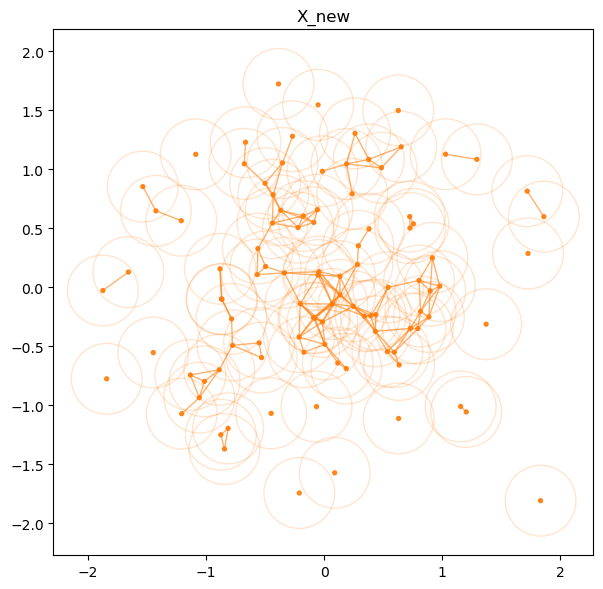

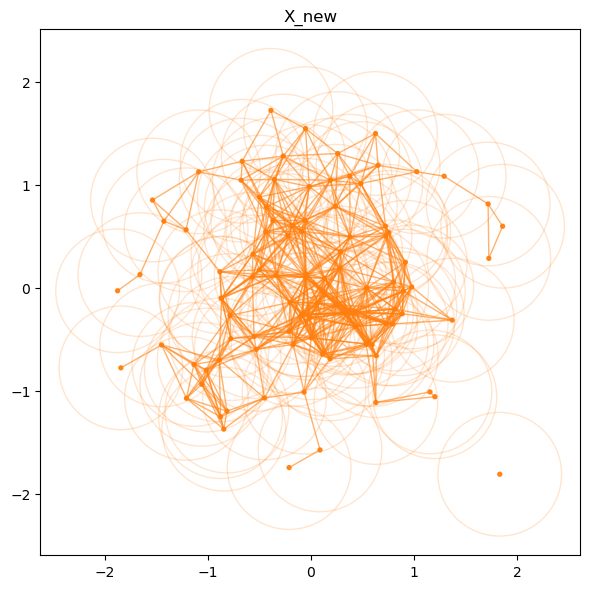

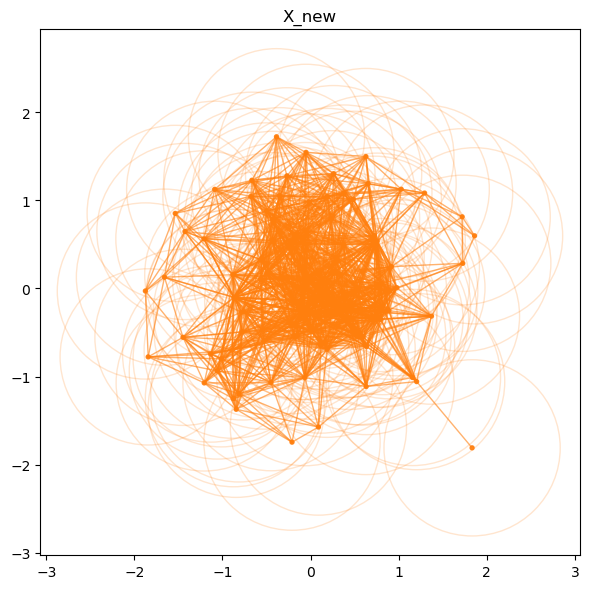

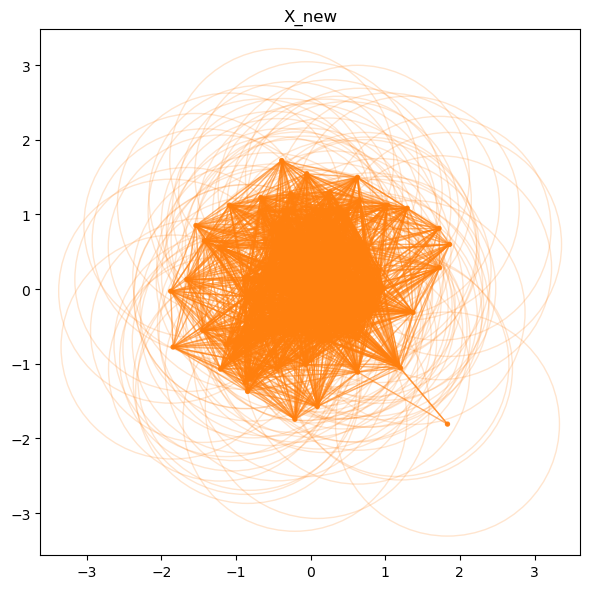

In [16]:
X_new = dfnw[['p1', 'p2']].values
plot_rips_complex(X_new, R=.3, label="X_new", maxdim=1)
plot_rips_complex(X_new, R=0.6, label="X_new", maxdim=1)
plot_rips_complex(X_new, R=1, label="X_new", maxdim=1)
plot_rips_complex(X_new, R=1.5, label="X_new", maxdim=1)

In [17]:
wdf = pd.read_csv("Activity3.csv")
wdf
dfk = wdf.rename(columns= {"0": "p1", "1": "p2"})
dfk.max()

p1    14.496662
p2    11.175014
dtype: float64

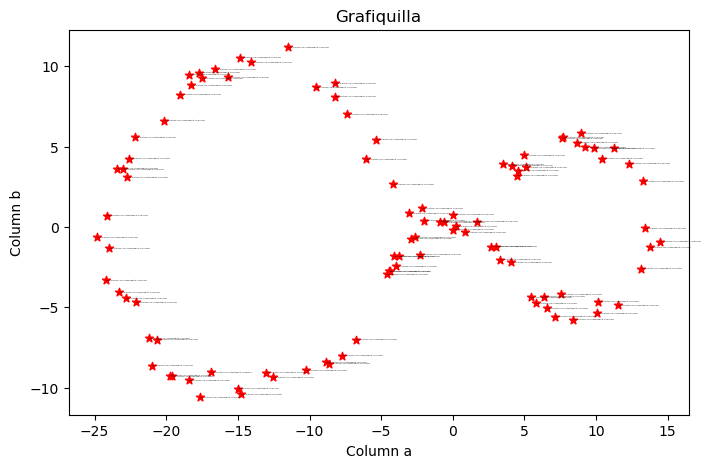

In [18]:
plt.figure(figsize =(8,5))
plt.scatter(dfk["p1"],dfk["p2"],c="r",marker="*")
plt.xlabel("Column a")
plt.ylabel("Column b")

plt.title("Grafiquilla")
for j in dfk.itertuples():
    plt.annotate(j.index,(j.p1,j.p2),fontsize=0)

In [19]:
disst=pd.DataFrame(squareform(pdist(dfk[["p1","p2"]]),"euclidean"),columns=dfnuevo.index.values,index=dfnuevo.index.values)
disst

0          1          2          3          4          5   \
0    0.000000  18.652085  17.402128   6.614525   1.739863  14.260669   
1   18.652085   0.000000   1.904894  19.976156  20.192793   8.254895   
2   17.402128   1.904894   0.000000  19.282322  18.877845   6.350069   
3    6.614525  19.976156  19.282322   0.000000   7.569256  18.198738   
4    1.739863  20.192793  18.877845   7.569256   0.000000  15.356038   
..        ...        ...        ...        ...        ...        ...   
95  13.975678  18.194851  18.337289   8.515836  15.399392  20.094638   
96  19.722760  21.048187  21.649366  14.027518  21.128626  24.580517   
97  21.376105  23.412926  24.025338  15.355846  22.692734  26.902236   
98  21.347234  24.037804  24.603904  15.204046  22.618487  27.326176   
99  13.682761  18.142380  18.254622   8.222856  15.103600  19.926054   

           6          7          8          9   ...         90         91  \
0   18.306369   4.321607  11.569415  17.888074  ...  16.290179  14.500682   
1    0.390541  19.634802  12.484377   0.957017  ...  19.133768  18.310447   
2    1.837290  18.736088  10.609183   0.980201  ...  19.483963  18.505823   
3   19.589601   2.340488  16.773912  19.449567  ...  10.722151   9.037785   
4   19.854937   5.231932  12.277479  19.404334  ...  17.708982  15.928539   
..        ...        ...        ...        ...  ...        ...        ...   
95  17.821981  10.497571  20.578130  18.064780  ...   2.314504   0.531008   
96  20.717177  16.139055  25.680663  21.158790  ...   3.435578   5.227321   
97  23.084039  17.575301  27.885291  23.531406  ...   5.362697   7.084174   
98  23.703715  17.459071  28.184245  24.132154  ...   5.618672   7.259213   
99  17.767669  10.200341  20.359654  17.997066  ...   2.607943   0.828433   

           92         93         94         95         96         97  \
0   22.001171  14.930703  14.691244  13.975678  19.722760  21.376105   
1   24.743488  18.032438  17.792009  18.194851  21.048187  23.412926   
2   25.325247  18.288663  18.032462  18.337289  21.649366  24.025338   
3   15.806096   9.596807   9.424855   8.515836  14.027518  15.355846   
4   23.252298  16.387453  16.158448  15.399392  21.128626  22.692734   
..        ...        ...        ...        ...        ...        ...   
95   8.434551   1.099036   1.000292   0.000000   5.748713   7.567071   
96   3.696745   4.856351   5.124293   5.748713   0.000000   2.376392   
97   1.379394   6.844837   7.130859   7.567071   2.376392   0.000000   
98   0.745004   7.091216   7.381338   7.713798   3.006916   0.859994   
99   8.686729   1.381106   1.253639   0.297463   6.040451   7.837957   

           98         99  
0   21.347234  13.682761  
1   24.037804  18.142380  
2   24.603904  18.254622  
3   15.204046   8.222856  
4   22.618487  15.103600  
..        ...        ...  
95   7.713798   0.297463  
96   3.006916   6.040451  
97   0.859994   7.837957  
98   0.000000   7.969665  
99   7.969665   0.000000  

[100 rows x 100 columns]

In [20]:
new_points = dfk[['p1', 'p2']].values.tolist()
rips_complex = gudhi.RipsComplex(points=new_points, max_edge_length=15.0)

In [21]:
simplex_tree=rips_complex.create_simplex_tree(max_dimension=2)
result_str="Rips Complex us of dimension"+ repr(simplex_tree.dimension())+"-"+ \
    repr(simplex_tree.num_simplices())+ "simplices -" + \
    repr(simplex_tree.num_vertices())+  "vertices."
print(result_str)

fmt = "%s -> %.2f"

for filtered_value in simplex_tree.get_filtration():
    print( fmt % tuple(filtered_value))

Rips Complex us of dimension2-31504simplices -100vertices.
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[7] -> 0.00
[8] -> 0.00
[9] -> 0.00
[10] -> 0.00
[11] -> 0.00
[12] -> 0.00
[13] -> 0.00
[14] -> 0.00
[15] -> 0.00
[16] -> 0.00
[17] -> 0.00
[18] -> 0.00
[19] -> 0.00
[20] -> 0.00
[21] -> 0.00
[22] -> 0.00
[23] -> 0.00
[24] -> 0.00
[25] -> 0.00
[26] -> 0.00
[27] -> 0.00
[28] -> 0.00
[29] -> 0.00
[30] -> 0.00
[31] -> 0.00
[32] -> 0.00
[33] -> 0.00
[34] -> 0.00
[35] -> 0.00
[36] -> 0.00
[37] -> 0.00
[38] -> 0.00
[39] -> 0.00
[40] -> 0.00
[41] -> 0.00
[42] -> 0.00
[43] -> 0.00
[44] -> 0.00
[45] -> 0.00
[46] -> 0.00
[47] -> 0.00
[48] -> 0.00
[49] -> 0.00
[50] -> 0.00
[51] -> 0.00
[52] -> 0.00
[53] -> 0.00
[54] -> 0.00
[55] -> 0.00
[56] -> 0.00
[57] -> 0.00
[58] -> 0.00
[59] -> 0.00
[60] -> 0.00
[61] -> 0.00
[62] -> 0.00
[63] -> 0.00
[64] -> 0.00
[65] -> 0.00
[66] -> 0.00
[67] -> 0.00
[68] -> 0.00
[69] -> 0.00
[70] -> 0.00
[71] -> 0.00
[72] -> 0.00
[7

In [22]:
def plot_rips_complex(data, R, label="data", col=1, maxdim=2):
    tab10 = cm.get_cmap('tab10')

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(label)
    ax.scatter(
        data[:, 0], data[:, 1], label=label,
        s=8, alpha=0.9, c=np.array(tab10([col] * len(data)))
    )

    for xy in data:
        ax.add_patch(mpatches.Circle(xy, radius=R, fc='none', ec=tab10(col), alpha=0.2))

    for i, xy in enumerate(data):
        if maxdim >=1:
            for j in range(i + 1, len(data)):
                pq = data[j]
                if (xy != pq).all() and (np.linalg.norm(xy - pq) <= R):
                    pts = np.array([xy, pq])
                    ax.plot(pts[:, 0], pts[:, 1], color=tab10(col), alpha=0.6, linewidth=1)
                if maxdim == 2:
                    for k in range(j + 1, len(data)):
                        ab = data[k]
                        if ((ab != pq).all()
                                and (np.linalg.norm(xy - pq) <= R)
                                and (np.linalg.norm(xy - ab) <= R)
                                and (np.linalg.norm(pq - ab) <= R)
                        ):
                            pts = np.array([xy, pq, ab])
                            ax.fill(pts[:, 0], pts[:, 1], facecolor=tab10(col), alpha=0.1)
                        pass

    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    pass

/var/folders/0n/92mz65hj527d4cmt71d5s0q00000gn/T/ipykernel_37637/2475964212.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


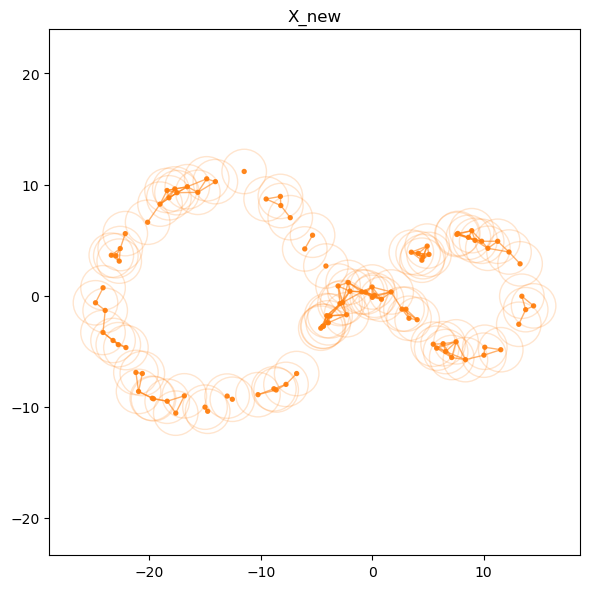

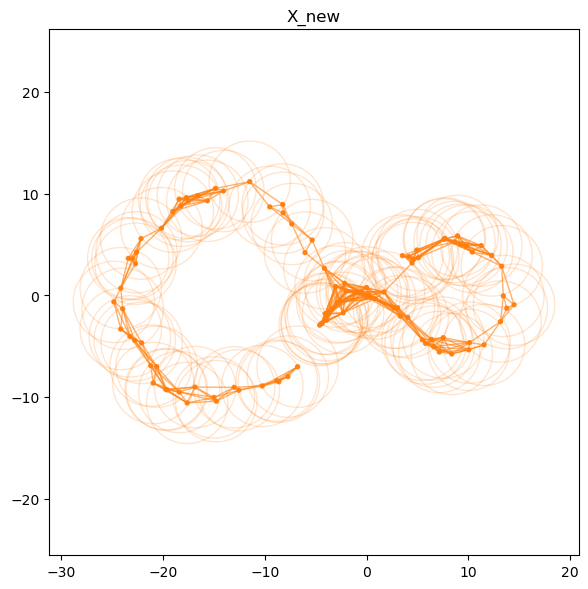

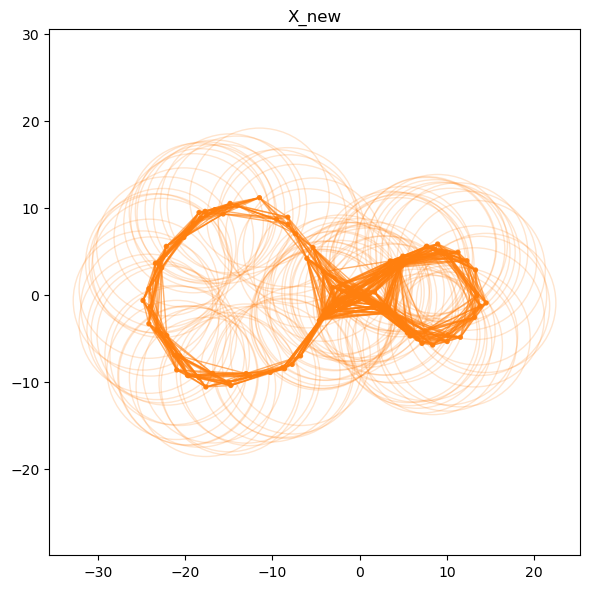

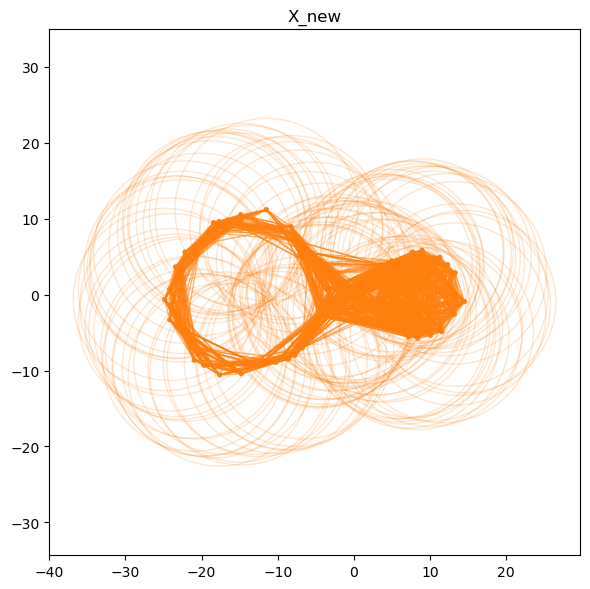

In [24]:
X_new = dfk[['p1', 'p2']].values
plot_rips_complex(X_new, R=2, label="X_new", maxdim=1)
plot_rips_complex(X_new, R=4, label="X_new", maxdim=1)
plot_rips_complex(X_new, R=8, label="X_new", maxdim=1)
plot_rips_complex(X_new, R=12, label="X_new", maxdim=1)